# PROJET 2 : Analysez des données de systèmes éducatifs

# SOMMAIRE
## [CONTEXTE DU PROJET](#1)<a class="anchor" id="sommaire"></a>
## [LES DONNEES DU PROJET](#2)<a class="anchor" id="sommaire"></a>
## [IMPORT DES LIBRAIRIES](#3)<a class="anchor" id="sommaire"></a>
## [CHARGEMENT DES DONNEES](#4)<a class="anchor" id="sommaire"></a>
## [1: ANALYSE DE LA QUALITE DES DONNEES](#5)<a class="anchor" id="sommaire"></a>
### [a. Nettoyage](#6)<a class="anchor" id="sommaire"></a>
### [b. Mise en valeur hiérarchie des variables](#7)<a class="anchor" id="sommaire"></a>
## [2: TAUX DE REMPLISSAGE](#8)<a class="anchor" id="sommaire"></a>
### [a. Taux de remplissage global et réduction nombre de pays](#9)<a class="anchor" id="sommaire"></a>
### [b. Taux de remplissage des variables suite filtres](#10)<a class="anchor" id="sommaire"></a>
### [c. Analyse de la représentativité de nos variables en terme de pays couverts](#11)<a class="anchor" id="sommaire"></a>
## [3 : ANALYSES GRAPHIQUES](#12)<a class="anchor" id="sommaire"></a>
### [a. Taux d'accès internet](#13)<a class="anchor" id="sommaire"></a>
### [b. Santé économique et secondaire](#14)<a class="anchor" id="sommaire"></a>
### [c. Taux de croissance démographique](#15)<a class="anchor" id="sommaire"></a>
## [CONCLUSION](#16)<a class="anchor" id="sommaire"></a>

## [CONTEXTE DU PROJET](#sommaire)<a class="anchor" id="1"></a>

<p>Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.</p>

<p>Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.<:p>

<p>Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :<br><br>

Quels sont les pays avec un fort potentiel de clients pour nos services ?<br>
Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?<br>
Dans quels pays l'entreprise doit-elle opérer en priorité ?</p>


## [LES DONNEES DU PROJET](#sommaire)<a class="anchor" id="2"></a>

<p>Les données de la Banque mondiale sont disponibles à l’adresse suivante :<br><br>

https://datacatalog.worldbank.org/dataset/education-statistics</p>

## [IMPORT DES LIBRAIRIES](#sommaire)<a class="anchor" id="3"></a>

In [1]:
import pandas as pd, numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import metrics
from functions import *
from textwrap import wrap

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [2]:
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

## [CHARGEMENT DES DONNEES](#sommaire)<a class="anchor" id="4"></a>

In [3]:
Raw_data = pd.read_csv("Data/EdStatsData.csv")
Region_country = pd.read_csv("Data/EdStatsCountry.csv")

## [1. Analyse de la qualité des données](#sommaire)<a class="anchor" id="5"></a>

### [a. Nettoyage](#sommaire)<a class="anchor" id="6"></a>

In [4]:
Raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [5]:
Raw_data = Raw_data.drop("Unnamed: 69", axis = 1)

**Le jeu de données est très incomplet, nous avons 886930 lignes et l'année avec le plus de valeurs non null est l'année 2010 avec 242442 valeurs. Nous allons au passage supprimer la dernière colonne qui semble être une erreur.<br>
Nous allons maintenant analyser les doublons si il en existe.**

In [6]:
Raw_data.loc[Raw_data.duplicated()]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100


**Il ne semble pas y avoir de doublons.**

In [7]:
Raw_data["Country Name"].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


**On remarque que certains nom de pays ne sont pas des noms de pays, mais des ensembles géographiques ou économiques, nous devons les supprimer.**

In [8]:
Raw_data = Raw_data.set_index("Country Name")

In [9]:
Raw_data = Raw_data.drop(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income', 'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World'])

In [10]:
Raw_data = Raw_data.reset_index()

### [b. Mise en valeur hiérarchie des variables](#sommaire)<a class="anchor" id="7"></a>

**La variable "Indicator Code" semble suivre une hiérarchie séparée par des points, nous allons la mettre en évidence pour mieux catégoriser les variables.**

In [11]:
Raw_data = pd.concat([Raw_data, Raw_data["Indicator Code"].str.split(".", expand = True)], axis = 1)

In [12]:
Raw_data = movecol(Raw_data, cols_to_move = [0, 1, 2, 3, 4, 5, 6], ref_col = "Indicator Code")
Raw_data.shape

(795305, 76)

In [13]:
Raw_data.groupby(0).count()

,Country Name,Country Code,Indicator Name,Indicator Code,1,2,3,4,5,6,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BAR,78120,78120,78120,78120,78120,78120,71610,52080,19530,0,51840,0,0,0,0,51840,0,0,0,0,51840,0,0,0,0,51840,0,0,0,0,51840,0,0,0,0,51840,0,0,0,0,51840,0,0,0,0,51840,0,0,0,0,51840,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
HH,54250,54250,54250,54250,54250,54250,53382,41447,3906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,500,345,750,600,550,500,1100,610,1400,670,1500,650,350,1400,850,3218,2469,1210,1170,650,1804,1297,1725,800,1475,590,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
IT,434,434,434,434,434,434,434,0,0,0,8,0,0,0,0,8,8,8,8,8,9,11,10,11,11,13,14,15,49,50,267,104,120,143,182,247,287,312,338,352,358,379,381,372,375,369,296,252,230,205,202,204,202,201,201,201,201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LO,226982,226982,226982,226982,226982,226982,222425,161231,53382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2922,0,288,0,1780,2684,783,0,6645,18,54,7736,4870,57,6940,210,5385,8387,699,1192,10106,675,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NY,2604,2604,2604,2604,2604,2604,2604,1302,0,0,698,702,713,716,718,728,733,761,761,772,821,839,856,861,872,884,894,910,920,935,1964,1982,2022,2054,2071,2168,2177,2203,2209,2221,2261,2279,2310,2312,2320,2320,2323,2325,2324,2318,2329,2329,2294,2296,2259,2244,2186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
OECD,3472,3472,3472,3472,3472,3472,3472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,300,366,339,351,313,243,234,252,252,258,355,502,486,484,484,468,511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PRJ,66836,66836,66836,66836,66836,66836,66836,58590,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51128,0,0,0,0,51124,0,0,51128,51128,51128,51128,51128,51128,51128,51128,51128,51128,51128,51128,51128,51128,51128,51128,51128
SABER,46655,46655,46655,46655,46655,46655,38409,12152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,176,116,701,785,502,410,391,143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SE,37541,37541,37541,37541,37541,37541,32116,20181,5859,0,3535,8970,8698,8652,8548,8517,8949,8844,8768,8683,8800,9429,8984,9196,9308,9042,9541,9039,8869,8767,8785,9473,9294,9491,9765,9552,9167,7719,9635,16666,17009,17103,17464,17023,18077,17976,17513,18635,18863,19105,19083,19511,19289,18374,18182,14796,2379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Nous allons maintenant nous intéressé au taux de remplissage des variables. Pour cela nous analysons la moyenne des valeurs non-nul. (La moyenne et non la médiane, car ce qui nous intéresse c'est de mettre en évidence les variables du groupes qui sont les plus remplies, le phénomène d'influences des extrêmes sur la moyenne est privilégié)<br>
Par contre nous nous limiterons au niveau 0, 1, 2, car à partir du niveau 3 on remarque une perte de variable indiquant que certaines variables se limites à ces 3 premiers niveaux**

## [2. Taux de remplissage](#sommaire)<a class="anchor" id="8"></a>

### [a. Taux de remplissage global et réduction nombre de pays](#sommaire)<a class="anchor" id="9"></a>

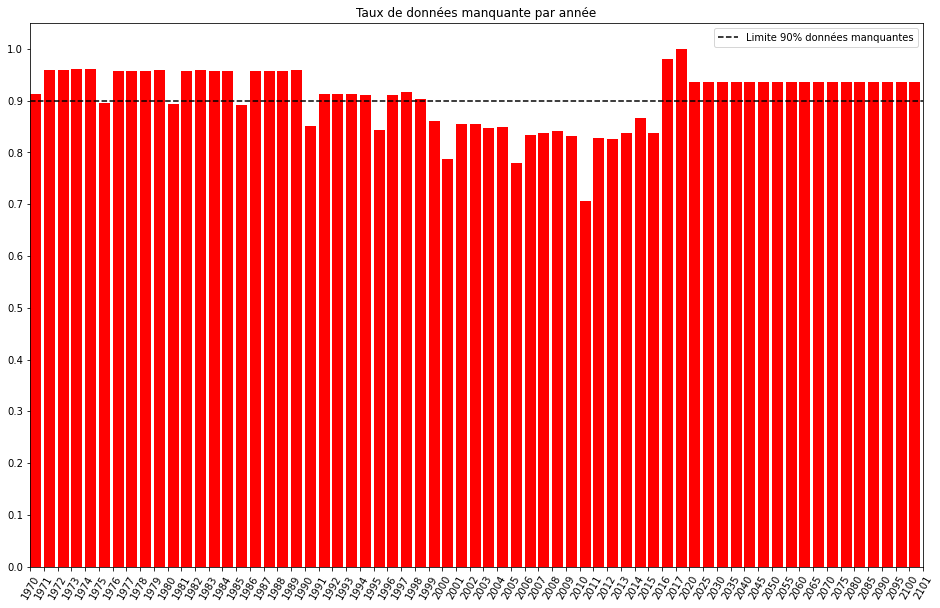

In [14]:
temp_NA_raw = Raw_data.isna().mean().iloc[11:]

fig, ax = plt.subplots(figsize=(16, 10))
ax.bar(x= temp_NA_raw.index, height =  temp_NA_raw.values, color = "red", align="edge")
ax.plot(["1970", "2101"], [0.9,0.9], "k--", label="Limite 90% données manquantes")
plt.xticks(rotation=60)
plt.yticks(np.arange(0, 1.05, 0.1))
plt.xlim("1970", "2101")
plt.legend()
plt.title("Taux de données manquante par année")
plt.draw()

**En analysant le taux de données manquantes par année, nous descendons vraiment sous le seuil des 90% de données manquantes à partir de 1999. Et que l'année la mieux remplie est 2010. Nous ne conserverons donc que les années à partir de 1999**

**Nous allons regarder dans la population total des pays, pour voir si les 217 pays actuels sont valable pour notre étude. Nous prendrons l'année 2015 comme référence car c'est l'année la plus récente avec un taux de remplissage acceptable**

In [15]:
Temp = Raw_data.loc[(Raw_data["Indicator Name"] == "Population, total")]

In [16]:
Temp = Temp.sort_values("2015", ascending = True)

In [17]:
mask = Temp[Temp["2015"] > Temp["2015"].quantile(0.1)]["Country Name"].to_list()

In [18]:
Raw_data = Raw_data[Raw_data["Country Name"].isin(mask)]

In [19]:
Raw_data["Country Name"].nunique()

189

**Suite au filtre sur les pays les plus faiblement peuplé, nous nous retrouvons avec 189 pays.**

### [b. Taux de remplissage des variables suite filtres](#sommaire)<a class="anchor" id="10"></a>

In [20]:
Raw_data = Raw_data.drop(Raw_data.loc[:,'1970':'1998'].columns.to_list(), axis = 1)

In [21]:
Raw_data.shape

(692685, 47)

In [22]:
Temp = Raw_data.copy()
Temp = Temp.iloc[:, np.r_[4, 11:47]].set_index(0).notna()
Temp.index.names = ["Indicator level 0"]

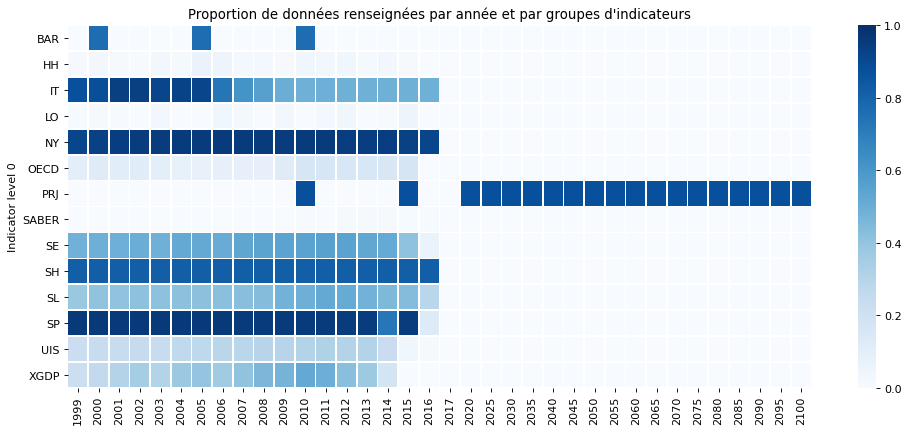

In [23]:
plt.figure(figsize=(15, 6), dpi=80)
plt.title("Proportion de données renseignées par année et par groupes d'indicateurs")
sns.heatmap(Temp.groupby("Indicator level 0").mean(), vmin=0, vmax=1, cmap="Blues", linewidths=.5)
plt.draw()

**Suite à l'étude du taux de remplissage des variables, nous remarquons 4 groupes avec un taux de remplissage très faibles. On remarque aussi que le seul groupe ayant des valeurs de prédiction est le groupe PRJ**

Etudions les groupes de variables :

<ul>
    <li>BAR : Indicateurs barro-lee, aggrégés sur 5 ans selon 7 niveaux d'éducation</li>
    <li>HH : regroupe DHS (Demographic and Health Surveys) et MICS (Multiple Indicator Cluster Surveys)</li>
    <li>IT : Infrastructure : utilisateurs internet et ordinateurs</li>
    <li>LO : Learning Outcomes (Evaluation du niveau des éléves en science, lecture..)</li>
    <li>NY : National Accounts, produits intérieurs et nationaux</li>
    <li>OECD : OCDE, salaires des enseignants du secteur public</li>
    <li>PRJ : Projections Wittgenstein (durée de scolarisation, populations..)</li>
    <li>SABER : System Approach for Better Education</li>
    <li>SE : Social Education</li>
    <li>SL : Social Labor</li>
    <li>SH : Social Health</li>
    <li>SP : Social Population</li>
    <li>UIS : Unesco Institute for Statistics</li>
    <li>XGDP : Dépenses publiques dans l'éducation</li>
</ul>

<b>Nous developpons une activité de elearning pour les classes de secondaire et tertiaire.<br>
A ce titre nous voulons des variables qui parlent d'éducations, d'accès à internet, de données quantitative sur nos cibles clients leur nombre et même revenus.<b>

**Nous sélectionnons donc les groupes de variables : SE, IT, SP, NY**

In [24]:
Raw_data = Raw_data.loc[((Raw_data[0] == "SE") | (Raw_data[0] == "IT") | (Raw_data[0] == "SP") | (Raw_data[0] == "NY")), :]

In [25]:
Raw_data.shape

(75978, 47)

**Nous passons de 795305 lignes à seulement 75978 lignes.**

In [26]:
droplist = temp_NA_raw.loc["1970":"1998"].index
temp_NA_raw = temp_NA_raw.drop(droplist)

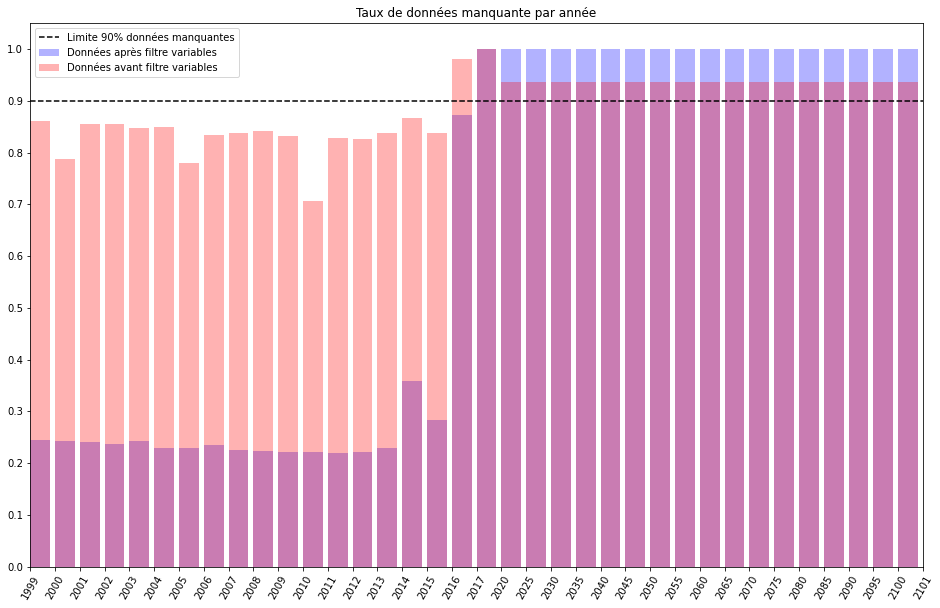

In [27]:
temp = Raw_data.isna().mean().iloc[11:]

fig, ax = plt.subplots(figsize=(16, 10))
ax.bar(x= temp.index, height =  temp.values, color = "blue", align="edge", alpha=0.3, label = "Données après filtre variables")
ax.bar(x= temp_NA_raw.index, height =  temp_NA_raw.values, color = "red", align="edge", alpha = 0.3, label = "Données avant filtre variables")
ax.plot(["1999", "2101"], [0.9,0.9], "k--", label="Limite 90% données manquantes")
plt.xticks(rotation=60)
plt.yticks(np.arange(0, 1.05, 0.1))
plt.xlim("1999", "2101")
plt.legend()
plt.title("Taux de données manquante par année")
plt.draw()

**La limitation des groupes de variables permet d'avoir un jeu de données plus complet en terme de taux de remplissage par année. Ca confirme aussi le choix de 2015 pour l'année de référence**

In [28]:
Raw_data = Raw_data.drop([0,1,2,3,4,5,6, "Indicator Code"], axis = 1)

In [29]:
Reshape_data = Raw_data.set_index(Raw_data.columns[:4].to_list()).stack(dropna = True).reset_index()
Reshape_data = Reshape_data.rename(columns= {"level_4":"Year", 0:"Value"})

In [30]:
del Raw_data

In [31]:
Reshape_data = Reshape_data.pivot(index = ['Country Name', 'Country Code', 'Year'], columns = 'Indicator Name', values = 'Value').reset_index()

<b>On peut voir ici qu'il ne comprend pas la colonne Year comme des années, car il donne le type object à cette colonne, nous allons lui donner le type int.</b>

In [32]:
Reshape_data["Year"] = Reshape_data["Year"].astype(int)

### [c. Analyse de la représentativité de nos variables en terme de pays couverts](#sommaire)<a class="anchor" id="11"></a>

**Nous analysons maintenant le nombre de pays couverts par nos indicateurs**

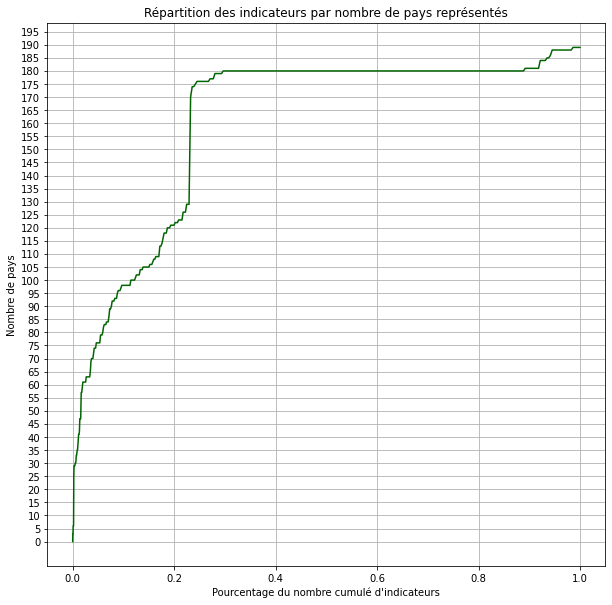

In [33]:
Ca_clients = Reshape_data[Reshape_data["Year"]==2015].count().sort_values(axis=0, ascending= True)
Ca_clients = np.array(Ca_clients.array)

X_lorenz = Ca_clients.cumsum() / Ca_clients.sum()
X_lorenz[0], X_lorenz[-1]

(0.0, 1.0)

fig, ax = plt.subplots(figsize=[10,10])
## scatter plot of Lorenz curve
ax.plot(X_lorenz, Ca_clients, color='darkgreen')
plt.title("Répartition des indicateurs par nombre de pays représentés")
ax.set_ylabel('Nombre de pays')
ax.set_xlabel("Pourcentage du nombre cumulé d'indicateurs")
plt.yticks(np.arange(0,200,5))
plt.grid()
plt.draw()

**De par la répartition précédente je choisi de supprimer les indicateurs ayant moins de 170 pays, ce qui permet de maximiser le nombre de pays et le nombre d'indicateurs, car nous conservons plus de 70% des indicateurs.**

In [34]:
mask = Reshape_data[Reshape_data["Year"]==2015].count() < 170

In [35]:
temp = Reshape_data[Reshape_data["Year"]==2015].count()
droplist = temp[mask].index.to_list()
droplist

['Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adult literacy rate, population 15+ years, both sexes (%)',
 'Adult literacy rate, population 15+ years, female (%)',
 'Adult literacy rate, population 15+ years, male (%)',
 'Cumulative drop-out rate to the last grade of primary education, both sexes (%)',
 'Cumulative drop-out rate to the last grade of primary education, female (%)',
 'Cumulative drop-out rate to the last grade of primary education, male (%)',
 'Current expenditure as % of total expenditure in public institutions (%)',
 'Effective transition rate from primary to lower secondary general education, both sexes (%)',
 'Effective transition rate from primary to lower secondary general education, female (%)',
 'Effective transition rate from primary to lower secondary general education, male (%)',
 'Enrolment in pre-primary education, both sexes (number)',
 'Enro

In [36]:
Reshape_data = Reshape_data.drop(droplist, axis = 1)
Reshape_data.shape

(3213, 235)

In [37]:
Reshape_data.columns

Index(['Country Name', 'Country Code', 'Year',
       'Duration of compulsory education (years)',
       'GDP at market prices (constant 2005 US$)',
       'GDP at market prices (current US$)',
       'GDP per capita (constant 2005 US$)', 'GDP per capita (current US$)',
       'GDP per capita, PPP (constant 2011 international $)',
       'GDP per capita, PPP (current international $)',
       ...
       'Population, ages 7-9, total', 'Population, female',
       'Population, female (% of total)', 'Population, male',
       'Population, male (% of total)', 'Population, total',
       'Theoretical duration of lower secondary education (years)',
       'Theoretical duration of primary education (years)',
       'Theoretical duration of secondary education (years)',
       'Theoretical duration of upper secondary education (years)'],
      dtype='object', name='Indicator Name', length=235)

**Nous intégrons une colonne Région pour regrouper les pays par région**

In [38]:
Reshape_data = Reshape_data.merge(Region_country.loc[:,["Country Code", "Region"]], left_on="Country Code", right_on="Country Code", how = "left")
Reshape_data = movecol(Reshape_data, cols_to_move=["Region"], ref_col='Country Code', place='After')

## [3. Analyses graphiques](#sommaire)<a class="anchor" id="12"></a>

In [39]:
Reshape_data.describe()

,Year,Duration of compulsory education (years),GDP at market prices (constant 2005 US$),GDP at market prices (current US$),GDP per capita (constant 2005 US$),GDP per capita (current US$),"GDP per capita, PPP (constant 2011 international $)","GDP per capita, PPP (current international $)","GDP, PPP (constant 2011 international $)","GDP, PPP (current international $)",GNI (current US$),"GNI per capita, Atlas method (current US$)","GNI per capita, PPP (current international $)","GNI, PPP (current international $)",Internet users (per 100 people),Official entrance age to lower secondary education (years),Official entrance age to primary education (years),Population growth (annual %),"Population of the official age for lower secondary education, both sexes (number)","Population of the official age for lower secondary education, female (number)","Population of the official age for lower secondary education, male (number)","Population of the official age for pre-primary education, both sexes (number)","Population of the official age for pre-primary education, female (number)","Population of the official age for pre-primary education, male (number)","Population of the official age for primary education, both sexes (number)","Population of the official age for primary education, female (number)","Population of the official age for primary education, male (number)","Population of the official age for secondary education, both sexes (number)","Population of the official age for secondary education, female (number)","Population of the official age for secondary education, male (number)","Population of the official age for the last grade of primary education, both sexes (number)","Population of the official age for the last grade of primary education, female (number)","Population of the official age for the last grade of primary education, male (number)","Population of the official age for upper secondary education, both sexes (number)","Population of the official age for upper secondary education, female (number)","Population of the official age for upper secondary education, male (number)","Population, age 0, female","Population, age 0, male","Population, age 0, total","Population, age 1, female","Population, age 1, male","Population, age 1, total","Population, age 10, female","Population, age 10, male","Population, age 10, total","Population, age 11, female","Population, age 11, male","Population, age 11, total","Population, age 12, female","Population, age 12, male","Population, age 12, total","Population, age 13, female","Population, age 13, male","Population, age 13, total","Population, age 14, female","Population, age 14, male","Population, age 14, total","Population, age 15, female","Population, age 15, male","Population, age 15, total","Population, age 16, female","Population, age 16, male","Population, age 16, total","Population, age 17, female","Population, age 17, male","Population, age 17, total","Population, age 18, female","Population, age 18, male","Population, age 18, total","Population, age 19, female","Population, age 19, male","Population, age 19, total","Population, age 2, female","Population, age 2, male","Population, age 2, total","Population, age 20, female","Population, age 20, male","Population, age 20, total","Population, age 21, female","Population, age 21, male","Population, age 21, total","Population, age 22, female","Population, age 22, male","Population, age 22, total","Population, age 23, female","Population, age 23, male","Population, age 23, total","Population, age 24, female","Population, age 24, male","Population, age 24, total","Population, age 25, female","Population, age 25, male","Population, age 25, total","Population, age 3, female","Population, age 3, male","Population, age 3, total","Population, age 4, female","Population, age 4, male","Population, age 4, total","Population, age 5, female","Population, age 5, male","Population, age 5, total","Population, age 6, female","Population, age 6, male",

### [a. Taux accès internet](#sommaire)<a class="anchor" id="13"></a>

In [40]:
temp_graph = Reshape_data.loc[Reshape_data["Year"] == 2015,["Region","Year", "Internet users (per 100 people)"]]
temp_graph = temp_graph.groupby("Region").agg({"Internet users (per 100 people)":"mean"})
temp_graph

,Internet users (per 100 people)
Region,
East Asia & Pacific,48.416011
Europe & Central Asia,70.690625
Latin America & Caribbean,50.689085
Middle East & North Africa,55.447096
North America,81.512101
South Asia,25.561539
Sub-Saharan Africa,17.765502


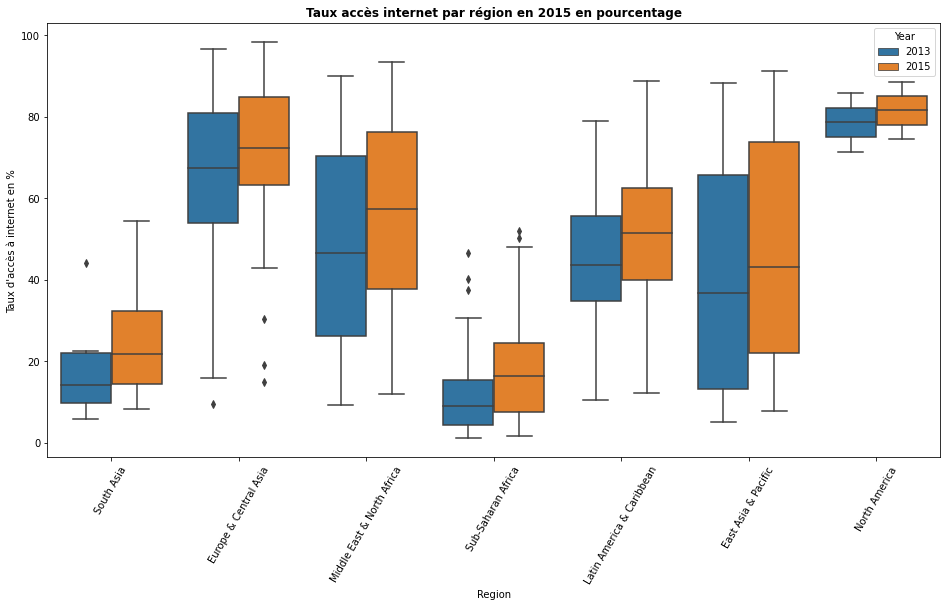

In [41]:
f, ax = plt.subplots(figsize=(16, 8))
plot_raw = Reshape_data[(Reshape_data["Year"]==2015) | (Reshape_data["Year"]==2013)]
sns.boxplot(data = plot_raw, x = "Region",
               y = "Internet users (per 100 people)", hue = "Year", ax = ax)
plt.ylabel("Taux d'accès à internet en %")
plt.xticks(rotation = 60)
plt.title("Taux accès internet par région en 2015 en pourcentage", fontweight = "bold")
plt.draw()

### [b. Santé économique et élèves du secondaire](#sommaire)<a class="anchor" id="14"></a>

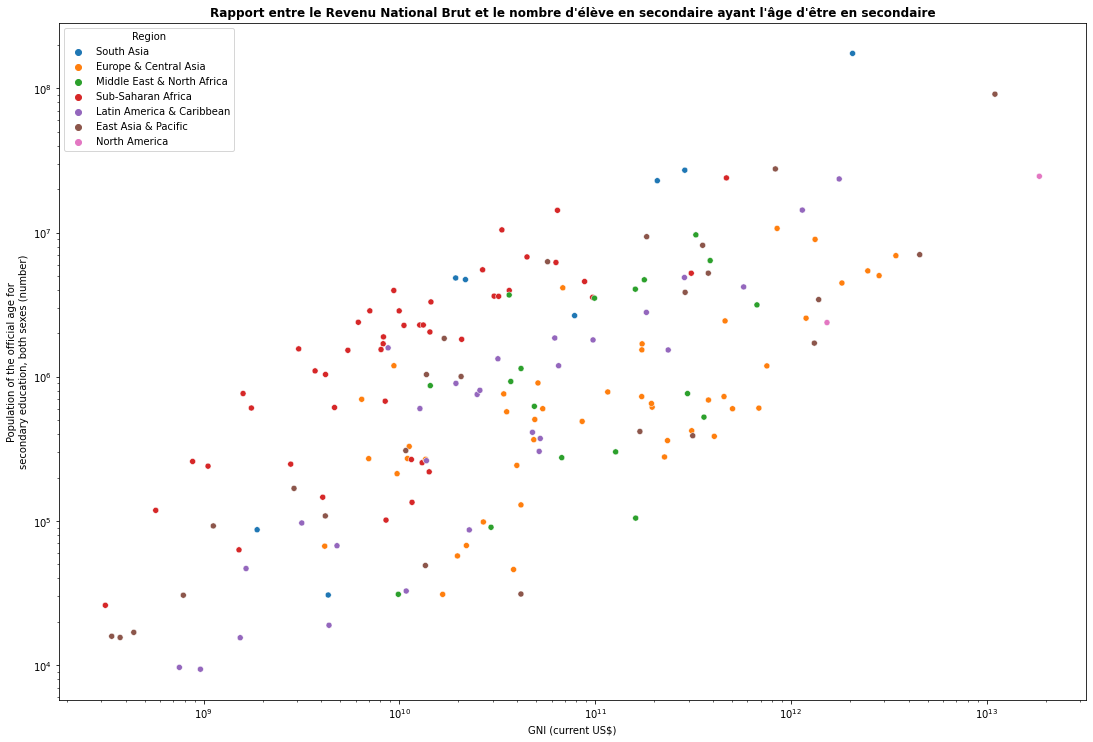

In [46]:
f, ax = plt.subplots(figsize=(15, 10))
f.tight_layout(h_pad=9)
sns.scatterplot(data = Reshape_data[Reshape_data["Year"]==2015], y = "Population of the official age for secondary education, both sexes (number)",
               x = "GNI (current US$)", hue="Region", ax = ax).set(xscale="log", yscale="log")
ax.set_title("Rapport entre le Revenu National Brut et le nombre d'élève en secondaire ayant l'âge d'être en secondaire", fontweight = "bold")
ax.set_ylabel('\n'.join(wrap("Population of the official age for secondary education, both sexes (number)",40)))
plt.draw()

### [c. Taux de croissance démographique](#sommaire)<a class="anchor" id="15"></a>

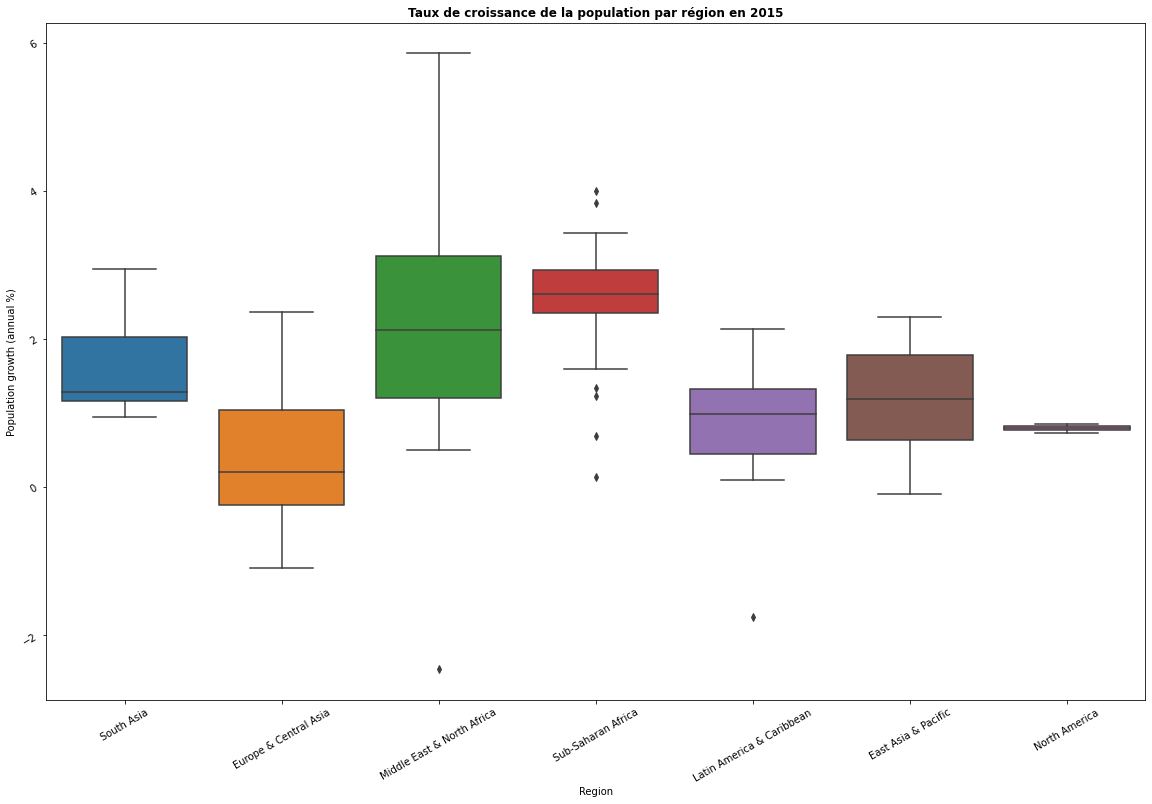

In [45]:
f, ax = plt.subplots(figsize=(16, 10))
f.tight_layout()
plt.xticks(rotation = 60)
sns.boxplot(data = Reshape_data[Reshape_data["Year"]==2015], x = "Region",
               y = "Population growth (annual %)", ax = ax)
ax.set_title("Taux de croissance de la population par région en 2015", fontweight = "bold")
ax.tick_params(labelrotation=30)
plt.draw()

## [CONCLUSION](#sommaire)<a class="anchor" id="16"></a>

**Le jeu de données malgré le nombre conséquent de données manquantes, nous arrivons à mobiliser 232 variables pour 170 pays. Et certaines de ces variables servent bien notre objectif.**